In [1]:
import bnn
import numpy as np
import os

In [2]:
class loadDataset():
    def __init__(self,path):
        self.dir= path

    def load_images(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=0)

        data=data.reshape(-1,3,32,32)
        return data

    def load_labels(self,filename):
        with open(os.path.join(self.dir,filename),'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=0)
        return labels

In [3]:
from PIL import Image

dataset=loadDataset(path='data')

images_set=dataset.load_images(filename='test-images.bin')
labels_set=dataset.load_labels(filename='test-labels.bin')

In [4]:
images_set=images_set.transpose([0,3,2,1])
images=[]
for i in range(images_set.shape[0]):
    im=Image.fromarray(images_set[i])
    images.append(im)

In [5]:
hw_w2a2 = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,'aedes',bnn.RUNTIME_HW)
results_w2a2 = hw_w2a2.classify_images(images)

pred_w2a2=[]
pred_w2a2.append(sum(results_w2a2[labels_set==0]==0)/sum(labels_set==0))
pred_w2a2.append(sum(results_w2a2[labels_set==1]==1)/sum(labels_set==1))
pred_w2a2.append(sum(results_w2a2[labels_set==2]==2)/sum(labels_set==2))
pred_w2a2.append(sum(results_w2a2[labels_set==3]==3)/sum(labels_set==3))
pred_w2a2.append(sum(results_w2a2[labels_set==4]==4)/sum(labels_set==4))
pred_w2a2=[ float('%.2f' % elem) for elem in pred_w2a2 ]

Inference took 143501.00 microseconds, 1195.84 usec per image
Classification rate: 836.23 images per second


In [6]:
hw_w1a2 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,'aedes',bnn.RUNTIME_HW)
results_w1a2 = hw_w1a2.classify_images(images)

pred_w1a2=[]
pred_w1a2.append(sum(results_w1a2[labels_set==0]==0)/sum(labels_set==0))
pred_w1a2.append(sum(results_w1a2[labels_set==1]==1)/sum(labels_set==1))
pred_w1a2.append(sum(results_w1a2[labels_set==2]==2)/sum(labels_set==2))
pred_w1a2.append(sum(results_w1a2[labels_set==3]==3)/sum(labels_set==3))
pred_w1a2.append(sum(results_w1a2[labels_set==4]==4)/sum(labels_set==4))
pred_w1a2=[ float('%.2f' % elem) for elem in pred_w1a2 ]

Inference took 41025.00 microseconds, 341.88 usec per image
Classification rate: 2925.05 images per second


In [7]:
hw_w1a1 = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'aedes',bnn.RUNTIME_HW)
results_w1a1 = hw_w1a1.classify_images(images)

pred_w1a1=[]
pred_w1a1.append(sum(results_w1a1[labels_set==0]==0)/sum(labels_set==0))
pred_w1a1.append(sum(results_w1a1[labels_set==1]==1)/sum(labels_set==1))
pred_w1a1.append(sum(results_w1a1[labels_set==2]==2)/sum(labels_set==2))
pred_w1a1.append(sum(results_w1a1[labels_set==3]==3)/sum(labels_set==3))
pred_w1a1.append(sum(results_w1a1[labels_set==4]==4)/sum(labels_set==4))
pred_w1a1=[ float('%.2f' % elem) for elem in pred_w1a1 ]

Inference took 41211.00 microseconds, 343.42 usec per image
Classification rate: 2911.84 images per second


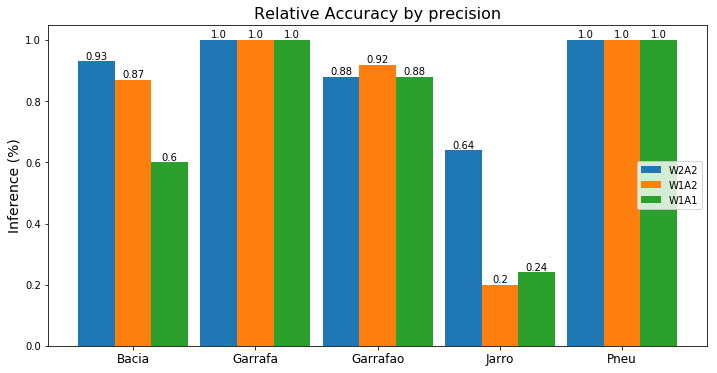

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(hw_w1a1.classes))  # the label locations
width = 0.3 # the width of the bars

fig, ax = plt.subplots(figsize=((30/2.54), (15/2.54)))
rects1 = ax.bar(x -width, pred_w2a2, width, label='W2A2')
rects2 = ax.bar(x , pred_w1a2, width, label='W1A2')
rects3 = ax.bar(x+width, pred_w1a1, width, label='W1A1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inference (%)', fontsize=14)
ax.set_title('Relative Accuracy by precision', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hw_w1a1.classes, fontsize=12)
ax.legend(loc='center right')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() +rect.get_width()/2 , height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig('relative_accuracy.png')

plt.show()

In [9]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()